# часть № 2 задания № 4

In [1]:
import pandas as pd
import numpy as np
import sqlite3

### Загрузка из базы

In [2]:
conn = sqlite3.connect('collection.db')
df = pd.read_sql("SELECT * from inp", conn)
df.head()

,ТИК,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,Территориальная избирательная комиссия №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82


### явка (%) по всем ТИК

In [3]:
percent_of_turnout = df.groupby('ТИК').sum()
percent_of_turnout = pd.Series((percent_of_turnout['Число избирательных бюллетеней, содержащихся в переносных ящиках '
                                                   'для голосования'] + percent_of_turnout['Число избирательных '
                                                                                           'бюллетеней, содержащихся '
                                                                                           'в стационарных ящиках для '
                                                                                           'голосования']) / 
                               percent_of_turnout['Число избирателей, внесенных в список избирателей на момент '
                                                  'окончания голосования']).sort_values(ascending=False) 
percent_of_turnout

ТИК
Цифровые избирательные участки                0.747664
Территориальная избирательная комиссия №18    0.507381
Территориальная избирательная комиссия №15    0.400074
Территориальная избирательная комиссия №13    0.396455
Территориальная избирательная комиссия №19    0.376655
Территориальная избирательная комиссия №8     0.360056
Территориальная избирательная комиссия №20    0.337091
Территориальная избирательная комиссия №9     0.332639
Территориальная избирательная комиссия №22    0.323727
Территориальная избирательная комиссия №30    0.319654
Территориальная избирательная комиссия №2     0.316594
Территориальная избирательная комиссия №1     0.313022
Территориальная избирательная комиссия №10    0.304767
Территориальная избирательная комиссия №29    0.304189
Территориальная избирательная комиссия №4     0.303324
Территориальная избирательная комиссия №21    0.290828
Территориальная избирательная комиссия №7     0.289317
Территориальная избирательная комиссия №25    0.288585
Террит

### Поиск избирательного участка, где Тихонова Надежда Геннадьевна получила наибольшую поддержку

In [4]:
count_of_turnout = (df['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] +
                    df['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования'])
df['Поддержка Тихоновой Надежды Геннадьевны'] = df.loc[count_of_turnout > 100]['Тихонова Надежда Геннадьевна'] / \
                                                df.loc[count_of_turnout > 100]['Число действительных ' \
                                                                               'избирательных бюллетеней']
df.loc[df['Поддержка Тихоновой Надежды Геннадьевны'].idxmax()]['УИК']


'УИК №2283'

### ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [5]:
max_ = df.groupby('ТИК').max()
min_ = df.groupby('ТИК').min()
pd.Series(max_['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] + 
          max_['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования'] - 
          min_['Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования'] - 
          min_['Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования']).idxmax()


'Территориальная избирательная комиссия №22'

### Дисперсия по явке для каждого ТИК (учитывая УИК)

In [8]:
df['Явка'] = count_of_turnout/df['Число избирателей, внесенных в список '
                                'избирателей на момент окончания голосования']
df.groupby('ТИК')['Явка'].var()

ТИК
Территориальная избирательная комиссия №1     0.019176
Территориальная избирательная комиссия №10    0.007428
Территориальная избирательная комиссия №11    0.024049
Территориальная избирательная комиссия №12    0.003220
Территориальная избирательная комиссия №13    0.039352
Территориальная избирательная комиссия №14    0.003146
Территориальная избирательная комиссия №15    0.041623
Территориальная избирательная комиссия №16    0.011306
Территориальная избирательная комиссия №17    0.033070
Территориальная избирательная комиссия №18    0.024045
Территориальная избирательная комиссия №19    0.020498
Территориальная избирательная комиссия №2     0.046172
Территориальная избирательная комиссия №20    0.017360
Территориальная избирательная комиссия №21    0.031005
Территориальная избирательная комиссия №22    0.045146
Территориальная избирательная комиссия №23    0.059075
Территориальная избирательная комиссия №24    0.027265
Территориальная избирательная комиссия №25    0.000844
Террит

### Результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

Левый столбец - %, правый - количество

Используется переменная  *count_of_turnout*, которая не зависит от кандидата, ибо это явка по участкам в целочисленном выражении

___Амосов Михаил Иванович___

In [7]:
(df['Амосов Михаил Иванович']*100/count_of_turnout).round().value_counts().sort_index()

0.0       1
1.0       6
2.0       6
3.0       2
4.0      13
5.0      18
6.0      25
7.0      35
8.0      48
9.0      68
10.0     89
11.0    100
12.0    117
13.0    130
14.0    131
15.0    160
16.0    153
17.0    152
18.0    126
19.0    102
20.0     89
21.0     82
22.0     77
23.0     44
24.0     56
25.0     40
26.0     45
27.0     26
28.0     26
29.0     17
30.0     15
31.0      5
32.0      6
33.0      4
34.0      1
35.0      3
36.0      2
42.0      1
48.0      1
dtype: int64

___Беглов Александр Дмитриевич___

In [8]:
(df['Беглов Александр Дмитриевич']*100/count_of_turnout).round().value_counts().sort_index()

20.0      1
30.0      1
32.0      1
33.0      2
38.0      3
39.0      3
40.0      3
41.0      5
42.0      3
43.0      3
44.0      9
45.0      8
46.0     10
47.0     21
48.0     14
49.0     24
50.0     27
51.0     37
52.0     37
53.0     44
54.0     36
55.0     52
56.0     62
57.0     68
58.0     77
59.0     79
60.0    122
61.0     93
62.0     92
63.0     97
       ... 
68.0     77
69.0     62
70.0     72
71.0     49
72.0     53
73.0     40
74.0     37
75.0     38
76.0     28
77.0     23
78.0     19
79.0     20
80.0     20
81.0     25
82.0     13
83.0     14
84.0     15
85.0      9
86.0      7
87.0      7
88.0      5
89.0      5
90.0      6
91.0      7
92.0      2
93.0      1
94.0      3
95.0      2
96.0      1
98.0      2
Length: 64, dtype: int64

___Тихонова Надежда Геннадьевна___

In [9]:
(df['Тихонова Надежда Геннадьевна']*100/count_of_turnout).round().value_counts().sort_index()

0.0       2
1.0       4
2.0       5
3.0      11
4.0       9
5.0      15
6.0      21
7.0      22
8.0      35
9.0      45
10.0     47
11.0     52
12.0     67
13.0     78
14.0    117
15.0    145
16.0    217
17.0    188
18.0    186
19.0    203
20.0    151
21.0    117
22.0     97
23.0     58
24.0     28
25.0     21
26.0     21
27.0      9
28.0      9
29.0      8
30.0      4
31.0      8
32.0      3
33.0      5
34.0      1
35.0      5
36.0      2
37.0      1
38.0      1
40.0      1
41.0      1
44.0      1
48.0      1
dtype: int64

### Отношение - явка на УИК  →  результат кандидата.

Произведём подготовительные операции

In [41]:
import matplotlib.pyplot as plt
df['Явка'] = count_of_turnout/df['Число избирателей, внесенных в список '
                                'избирателей на момент окончания голосования']

___Амосов Михаил Иванович___

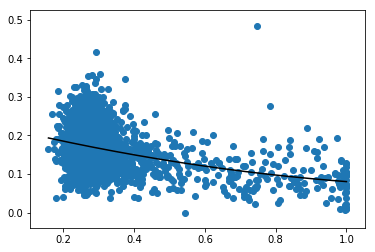

In [46]:
plt.scatter(df['Явка'], 
           (df['Амосов Михаил Иванович']/count_of_turnout))
plt.plot(np.unique(df['Явка']), np.poly1d(np.polyfit(df['Явка'], df['Амосов Михаил Иванович']/count_of_turnout, 2))(np.unique(df['Явка'])),color = 'black')

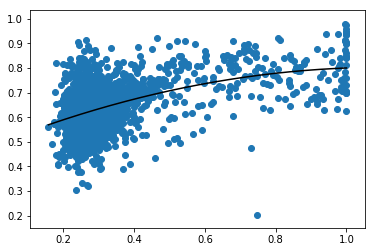

In [48]:
plt.scatter(df['Явка'], 
           (df['Беглов Александр Дмитриевич']/count_of_turnout))
plt.plot(np.unique(df['Явка']), np.poly1d(np.polyfit(df['Явка'], df['Беглов Александр Дмитриевич']/count_of_turnout, 2))(np.unique(df['Явка'])),color = 'black')

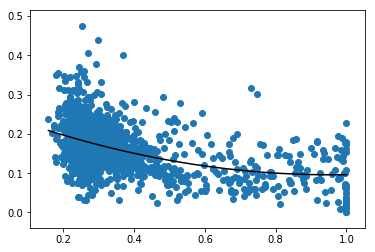

In [49]:
plt.scatter(df['Явка'], 
           (df['Тихонова Надежда Геннадьевна']/count_of_turnout))
plt.plot(np.unique(df['Явка']), np.poly1d(np.polyfit(df['Явка'], df['Тихонова Надежда Геннадьевна']/count_of_turnout, 2))(np.unique(df['Явка'])),color = 'black')

Если же их изобразить на одном графике, это будет выглядеть так:

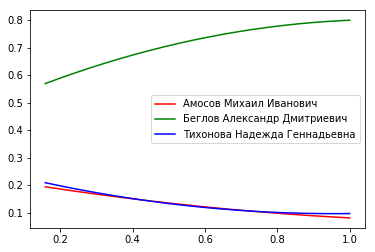

In [51]:
plt.plot(np.unique(df['Явка']), np.poly1d(np.polyfit(df['Явка'], df['Амосов Михаил Иванович']/count_of_turnout, 2))(np.unique(df['Явка'])), color = 'r', label='Амосов Михаил Иванович')
plt.plot(np.unique(df['Явка']), np.poly1d(np.polyfit(df['Явка'], df['Беглов Александр Дмитриевич']/count_of_turnout, 2))(np.unique(df['Явка'])), color = 'g', label='Беглов Александр Дмитриевич')
plt.plot(np.unique(df['Явка']), np.poly1d(np.polyfit(df['Явка'], df['Тихонова Надежда Геннадьевна']/count_of_turnout, 2))(np.unique(df['Явка'])), color = 'b', label='Тихонова Надежда Геннадьевна')
plt.legend()